Project datasets

In [1]:
#Libraries
import pandas as pd
import numpy as np
import osmnx as ox
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely import wkt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

Traffic Signal Signs

In [2]:
url = "Traffic_Signal_Signs_20240309.csv"
temp = pd.read_csv(url)

data_sign=temp[['INSTDATE','SIGN_CODE','SIGN_DSCRN','SIGN_SIZE','SIGN_TYPE','SUPPORT_TYPE','POINT']]
#data_sign = data_sign.dropna(subset=['SIGN_CODE', 'SIGN_DSCRN'], how='all')
data_sign=data_sign.dropna()
data_sign['geometry'] = data_sign['POINT'].apply(wkt.loads)
data_sign = gpd.GeoDataFrame(data_sign, geometry='geometry')
data_sign.set_crs(epsg=4326, inplace=True)
data_sign = data_sign.to_crs(epsg=32612)

In [3]:
display(data_sign.head())
display(data_sign.info())

,INSTDATE,SIGN_CODE,SIGN_DSCRN,SIGN_SIZE,SIGN_TYPE,SUPPORT_TYPE,POINT,geometry
6,2017/10/26,11-250,KRMS,600x750,Flat Sheet,Pedestal,POINT (-114.1969592 51.1542101),POINT (276439.761 5671833.766)
7,2020/12/02,11-250,KRMS,600x750,Flat Sheet,Pedestal,POINT (-114.2109842 51.0594918),POINT (274999.449 5661346.785)
9,2021/01/18,14-320,TAC Pedestrian Crosswalk,900x1200,Other,Arm,POINT (-114.0758307 51.1115973),POINT (284710.187 5666734.990)
10,2013/09/24,14-308,Pedestrian Crosswalk,600x750,Flat Sheet,Trunk,POINT (-114.1022882 51.0576832),POINT (282605.945 5660819.075)
11,2018/07/23,11-647,Turn Control - Thru + Left,900x900,Flat Sheet,Arm,POINT (-114.0317578 51.0474608),POINT (287500.600 5659476.697)


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4675 entries, 6 to 5215
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   INSTDATE      4675 non-null   object  
 1   SIGN_CODE     4675 non-null   object  
 2   SIGN_DSCRN    4675 non-null   object  
 3   SIGN_SIZE     4675 non-null   object  
 4   SIGN_TYPE     4675 non-null   object  
 5   SUPPORT_TYPE  4675 non-null   object  
 6   POINT         4675 non-null   object  
 7   geometry      4675 non-null   geometry
dtypes: geometry(1), object(7)
memory usage: 328.7+ KB


None

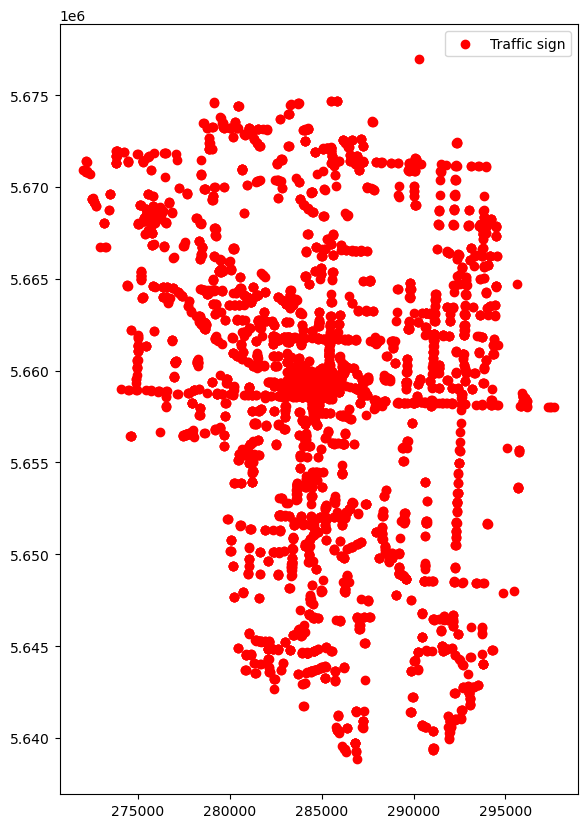

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))
data_sign.plot(ax=ax, color='red', linewidth=1, label='Traffic sign')
plt.legend()
plt.show()

Crosswalk

In [5]:
url = "Crosswalks_20240309.csv"
temp = pd.read_csv(url)

data_crosswalk=temp[['CROSSWALK_TYPE','CROSSWALK_COMP','POINT']]
data_crosswalk = data_crosswalk.dropna(subset=['CROSSWALK_TYPE', 'CROSSWALK_COMP'])

data_crosswalk['geometry'] = data_crosswalk['POINT'].apply(wkt.loads)
data_crosswalk = gpd.GeoDataFrame(data_crosswalk, geometry='geometry')
data_crosswalk.set_crs(epsg=4326, inplace=True)
data_crosswalk = data_crosswalk.to_crs(epsg=32612)

In [6]:
display(data_crosswalk.head())
display(data_crosswalk.info())

,CROSSWALK_TYPE,CROSSWALK_COMP,POINT,geometry
0,RSM,PARKING STALLS,POINT (-114.08130604284372 51.06727641297475),POINT (284120.635 5661823.806)
1,RSM,STOP LINE,POINT (-114.14111928809288 51.1831099606199),POINT (280481.098 5674878.256)
2,RSM,STOP LINE,POINT (-114.13499902937271 51.18319156789337),POINT (280909.112 5674869.061)
3,MULTIWAY STOP,STOP LINE,POINT (-114.08128908263517 50.98601632264809),POINT (283743.760 5652790.011)
4,SIGNALIZED,RIGHT TURN,POINT (-114.14117612481596 51.06009319728565),POINT (279892.864 5661202.565)


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4030 entries, 0 to 4048
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CROSSWALK_TYPE  4030 non-null   object  
 1   CROSSWALK_COMP  4030 non-null   object  
 2   POINT           4030 non-null   object  
 3   geometry        4030 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 157.4+ KB


None

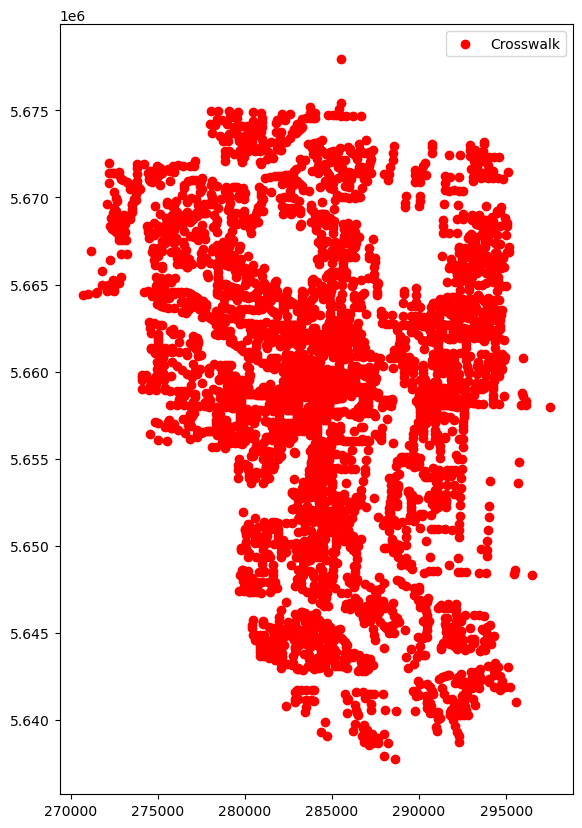

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
data_crosswalk.plot(ax=ax, color='red', linewidth=1, label='Crosswalk')
plt.legend()
plt.show()